# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
pd.options.display.max_columns = 50
# ds = pd.DataFrame(ds) (en teoria no haria falta)
ds.head(5)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
# TODO
ds_sorted_byprice = ds.sort_values(['price'],ascending=True)
most_exp = ds_sorted_byprice.tail(1)
most_exp_dir = most_exp['address'].iloc[0]
most_exp_price = most_exp['price'].iloc[0]
out_most_exp = f'La casa con dirección en {most_exp_dir} es la más cara y su precio es de {most_exp_price} USD'
print(out_most_exp)



La casa con dirección en El Escorial es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
ds_filtered = ds_sorted_byprice[ds_sorted_byprice['price'] != 0 ]
cheapest = ds_filtered.head(1)
cheapest_dir = cheapest['address'].iloc[0]
cheapest_price = cheapest['price'].iloc[0]
out_cheapest = f'La casa con dirección en calle {cheapest_dir} es la más barata y su precio es de {cheapest_price} USD'

print(out_cheapest)

#idxmin buscarla y aplicarla

La casa con dirección en calle Berlin, Coslada es la más barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
# TODO
ds_sorted_bysurface =  ds_sorted_byprice.sort_values(['surface'],ascending=True)
biggest_prop_address = ds_sorted_bysurface['address'].iloc[-1]
biggest_prop_surface = ds_sorted_bysurface['surface'].iloc[-1]
smallest_prop_adress = ds_sorted_bysurface['address'].iloc[0]
smallest_prop_surface = ds_sorted_bysurface['surface'].iloc[0]
out_biggest = f'La casa más grande está ubicada en {biggest_prop_address} y su superficie es de {biggest_prop_surface} metros'
out_smallest = f'La casa más pequeña está ubicada en {smallest_prop_adress} y su superficie es de {smallest_prop_surface} metros`'

print(out_biggest)
print(out_smallest)

#IDxmax y min de nuevo, facil y rapido


La casa más grande está ubicada en El Escorial y su superficie es de nan metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros`


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
# TODO
towns_list = list(ds_filtered['level5'].unique()) # encontre tambien value_counts() pero con esto agregaria una columna donde determinaria la ocurrencia de cada uno de esos valores unicos que muestro con .unique()
print(towns_list)

['Coslada', 'Los Santos de la Humosa', 'Cenicientos', 'Ambite', 'Colmenar de Oreja', 'Villarejo de Salvanés', 'Cadalso de los Vidrios', 'Ciempozuelos', 'Villalbilla', 'Villa del Prado', 'San Martín de Valdeiglesias', 'Villaconejos', 'Chinchón', 'Orusco de Tajuña', 'El Escorial', 'Robledo de Chavela', 'Torrelaguna', 'Valdaracete', 'Miraflores de la Sierra', 'San Martín de la Vega', 'Sevilla la Nueva', 'Valdemaqueda', 'Santa María de la Alameda', ' Madrid Capital', 'Aranjuez', 'Carabaña', 'Valverde de Alcalá', 'La Hiruela', 'Tielmes', 'El Molar (Madrid)', 'Fuentidueña de Tajo', 'Villamanrique de Tajo', 'Corpa', 'Fresnedillas de la Oliva', 'Titulcia', 'Torrejón de Ardoz', 'Villar del Olmo', 'Moralzarzal', 'Leganés', 'Garganta de los Montes', 'Horcajo de la Sierra', 'Navalcarnero', 'Valdilecha', 'Ribatejada', 'El Álamo', 'Alcalá de Henares', 'Parla', 'Villamantilla', 'Pelayos de la Presa', 'Valdeavero', 'Belmonte de Tajo', 'Chapinería', 'Becerril de la Sierra', 'Campo Real', 'Montejo de la

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
# TODO
theres_nan = ds.isna().values.any()
if theres_nan :
    nan_positions = ds.isna()
    nan_coords = []
    for row in nan_positions.index :
        for column in nan_positions.columns :
            nan_coords.append(f'Nan ubic en columna {column}, fila {row}')
df_nan_coords = pd.DataFrame(nan_coords)
print(df_nan_coords.tail())
print(len(df_nan_coords))
print(len(ds))

                                                 0
567390    Nan ubic en columna accuracy, fila 15334
567391    Nan ubic en columna latitude, fila 15334
567392   Nan ubic en columna longitude, fila 15334
567393     Nan ubic en columna zipCode, fila 15334
567394  Nan ubic en columna customZone, fila 15334
567395
15335


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
# TODO
new_df = pd.DataFrame(ds.dropna())
orig_db = len(ds)
new_db_nonan = len(new_df)

print(f'las dimensiones de ambos df son: \n - La Base Original tiene {orig_db} registos. \n - La Base habiendo eliminado valores NAs tiene {new_db_nonan} registros')


las dimensiones de ambos df son: 
 - La Base Original tiene 15335 registos. 
 - La Base habiendo eliminado valores NAs tiene 0 registros


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
# TODO
mean_by_level5 = round(ds_filtered.groupby('level5')['price'].mean(),2)
mean_price_arroyomol = mean_by_level5['Arroyomolinos (Madrid)']
print(f'La media de precios de la poblacion Arroyomolinos Madrid, es USD ${mean_price_arroyomol} ')


La media de precios de la poblacion Arroyomolinos Madrid, es USD $298905.18 


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


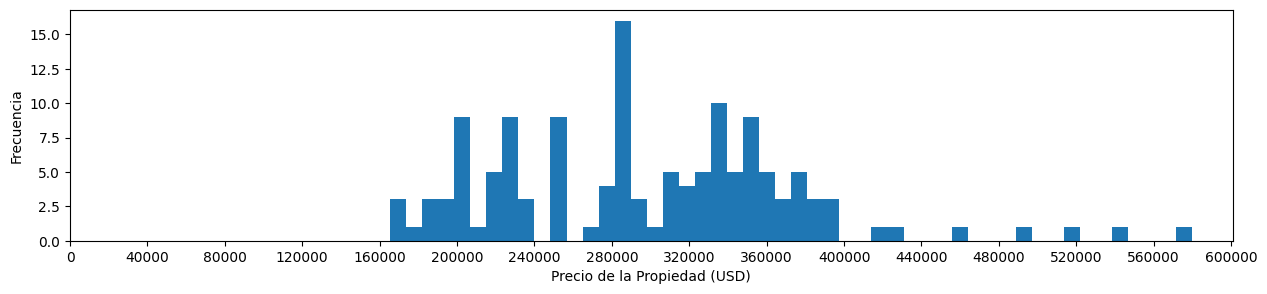

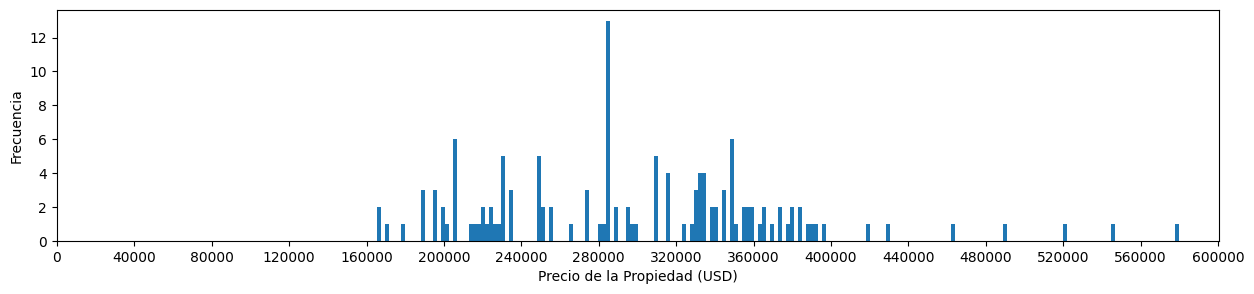

In [9]:
# TODO
import matplotlib.pyplot as plt
import numpy as np
all_arroyomol = pd.DataFrame(ds_filtered[ds_filtered['level5'] == 'Arroyomolinos (Madrid)'])
#pd.set_option('display.max_rows', 150)
#print(all_arroyomol['price'])
plt.subplots(figsize=(15,3))
plt.hist(all_arroyomol['price'],bins=50)
plt.xlabel('Precio de la Propiedad (USD)')
plt.ylabel('Frecuencia')
ticks = np.linspace(0, 600000, 16)
plt.xticks(ticks)
plt.subplots(figsize=(15,3))
plt.hist(all_arroyomol['price'],bins=200)
plt.xlabel('Precio de la Propiedad (USD)')
plt.ylabel('Frecuencia')
plt.xticks(ticks)
plt.show()


**Rango de precios:** varían considerablemente, comenzando desde aproximadamente 165k y llegando hasta 580k.

**Distribución de precios:** La mayoría de los precios se agrupan entre 210k y 360k. Más allá de este rango, los precios tienden a ser menos frecuentes.

**Picos en los precios:** Hay 6 puntos donde los precios se repiten marcadamente, el mas representativo de ellos en 280k:290k. Esto sugiere que algunas propiedades tienen precios estándar o populares en esos puntos.

**Incrementos abruptos:** Hacia el final de la lista, los precios muestran incrementos más grandes, alcanzando hasta 580,000. Estos podrían representar propiedades de lujo o áreas más exclusivas.

Este análisis sugiere una mayor concentración de propiedades en el rango de precios medio-bajo, con algunos outliers que podrían ser de interés para análisis adicionales, como la localización o características específicas de esas propiedades.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
# TODO
mean_price_valdemorillo = mean_by_level5['Valdemorillo']
mean_price_galapagar = mean_by_level5['Galapagar']
dif_valdemorillo_vs_galapagar = round(mean_price_valdemorillo - mean_price_galapagar,2)
print(f'La media de precios de la poblacion Valdemorillo, es USD ${mean_price_valdemorillo} ')
print(f'La media de precios de la poblacion Galapagar, es USD ${mean_price_galapagar} ')
print(f'La diferencia de de promedios de Valdemorillo respecto de Galapagar, es de USD ${dif_valdemorillo_vs_galapagar}' )


La media de precios de la poblacion Valdemorillo, es USD $363860.29 
La media de precios de la poblacion Galapagar, es USD $360063.2 
La diferencia de de promedios de Valdemorillo respecto de Galapagar, es de USD $3797.09


Las medias de precios de las poblaciones de Valdemorillo y Galapagar son similares, lo que sugiere que ambos mercados inmobiliarios tienen un perfil de precios que podria entenderse como parecidos. Sin embargo, para una interpretación más precisa, sería útil analizar la distribución completa de los precios en ambas localidades. Factores como la varianza, la presencia de propiedades con precios extremos, y otras medidas de dispersión también pueden ofrecer insights adicionales. Además, considerar aspectos cualitativos como las infraestructuras presentes en las localidades, los servicios disponibles y la calidad de los mismos, y la demanda del mercado, entre otros aspectos, puede complementar la comprensión obtenida a partir de las medias de precios.

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [11]:
# TODO
mean_by_level5 = pd.DataFrame(mean_by_level5)
mean_by_level5['surface'] = round(ds_filtered.groupby('level5')['surface'].mean(),2)
mean_by_level5['pps'] = round((mean_by_level5['price'] / mean_by_level5['surface']),2)
mean_by_level5 = mean_by_level5.sort_values(['pps'], ascending= False)
#pd.set_option('display.max_rows', 200)
print(mean_by_level5.head())

                         price  surface      pps
level5                                          
 Madrid Capital      625698.89   144.38  4333.70
Alcobendas          1457189.53   361.51  4030.84
Pozuelo de Alarcón  1118354.34   380.37  2940.17
Majadahonda          627967.35   215.24  2917.52
Tres Cantos          454547.65   186.52  2436.99


La lectura de los datos muestra que el precio promedio por metro cuadrado (pps) varía considerablemente entre las diferentes localidades de España. Madrid Capital destaca con un precio promedio de 4333.70 €/m², siendo uno de los más altos, lo cual refleja su demanda y centralidad. Otras áreas como Pozuelo de Alarcón y Alcobendas también presentan altos precios por metro cuadrado, evidenciando su atractivo y nivel socioeconómico elevado de esta zona geografica del area de influencia de Madrid. En contraste, localidades periféricas como Ambite y Navalafuente tienen precios significativamente más bajos, con 156.25 €/m² y 684.98 €/m² respectivamente, lo que indica menor demanda y posiblemente menor nivel de desarrollo urbano. Este rango de precios muestra una clara disparidad en el mercado inmobiliario de la región, influenciada por factores como la ubicación, accesibilidad y características socioeconómicas de cada área.

En el caso de Sevilla la Nueva, observamos una situación peculiar con un precio promedio por metro cuadrado (pps) extremadamente bajo de 16.12 €/m² con una superficie promedio por propiedad muy alta, con 18005.93 m². Este número sugiere que las propiedades en esta área son significativamente más grandes, posiblemente incluyendo terrenos o espacios no urbanizados/ no urbanizables. Este valor parece ser una anomalía en los datos, ya que es considerablemente más bajo en comparación con otras localidades de caracteristicas similares. Podría ser indicativo de un error en los datos o la presencia de una cantidad atípica de propiedades con superficies extremadamente grandes y precios relativamente bajos, que no reflejan el mercado inmobiliario típico.







#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

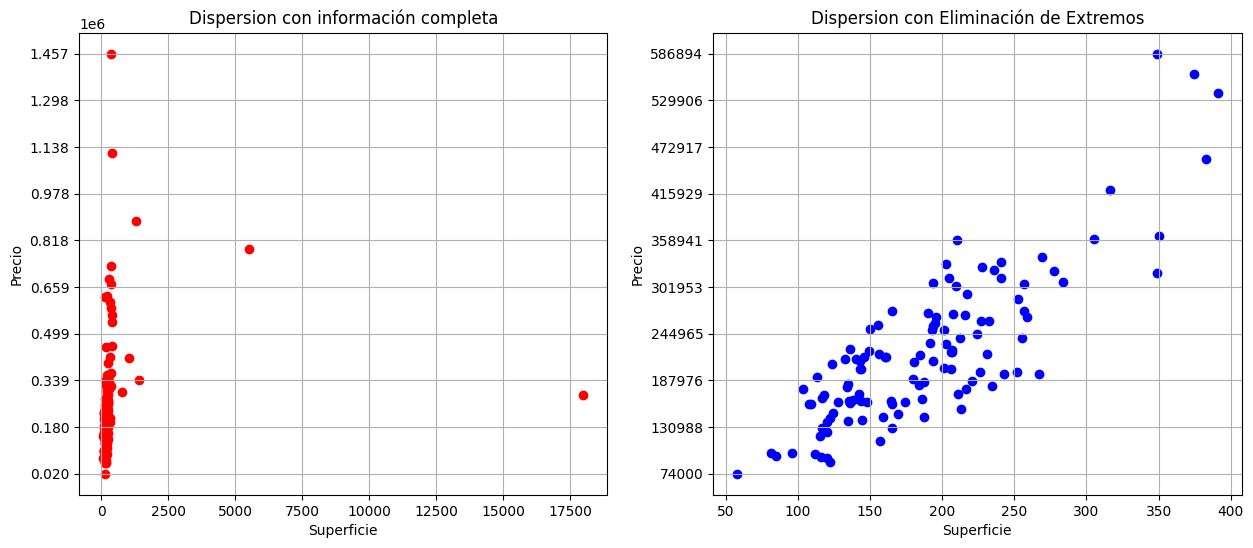

In [12]:
# TODO: 
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1,2,1)
plt.title('Dispersion con información completa')
plt.scatter(mean_by_level5['surface'], mean_by_level5['price'], c='red')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.grid(True)
plt.yticks(np.linspace(mean_by_level5['price'].min(),mean_by_level5['price'].max(),10))

price_min = mean_by_level5['pps'].quantile(0.15)
price_max = mean_by_level5['pps'].quantile(0.85)
surface_filtered = mean_by_level5[(mean_by_level5['pps'] >= price_min) & (mean_by_level5['pps'] <= price_max)]['surface']
price_filtered = mean_by_level5[(mean_by_level5['pps'] >= price_min) & (mean_by_level5['pps'] <= price_max)]['price']

ax2 = fig.add_subplot(1,2,2)
plt.title('Dispersion con Eliminación de Extremos')
plt.scatter(surface_filtered, price_filtered, c='blue')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.grid(True)
plt.yticks(np.linspace(price_filtered.min(), price_filtered.max(), 10))
#plt.xlin(0,2000)

plt.show()


El gráfico muestra la relación entre la superficie de las propiedades y sus precios promedio en la región de Madrid. Se observa una dispersión considerable de puntos, lo cual sugiere una variabilidad significativa en los precios en función de la superficie de las propiedades.

En términos generales, parece haber un patron uniforme y a la vez una tendencia levemente positiva entre la superficie y el precio, es decir, a medida que aumenta la superficie de las propiedades, tiende a aumentar también su precio promedio. Sin embargo, esta relación no es lineal ni uniforme, ya que se pueden identificar puntos dispersos que podrían indicar otros factores influyentes como la ubicación específica o características particulares de las propiedades.

Este análisis visual es crucial para entender cómo la superficie impacta en los precios de las propiedades a nivel local, proporcionando insights valiosos para potenciales inversiones o evaluaciones comparativas dentro del mercado inmobiliario de Madrid.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
# TODO
real_states_ag_number = len(ds_filtered['realEstate_name'].unique())
print(f'El Dataset contiene una cantidad de {real_states_ag_number} agencias de Bienes Raices.')

El Dataset contiene una cantidad de 1817 agencias de Bienes Raices.


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
# TODO
major_popul_town = ds_filtered['level5'].value_counts().head(1)
major_popul_town_etiq = major_popul_town.index[0]
major_popul_town_val = major_popul_town.iloc[0]
print(f'La poblacion con mayor cantidad de casas es {major_popul_town_etiq} con un total de {major_popul_town_val} propiedades en oferta.')


La poblacion con mayor cantidad de casas es  Madrid Capital con un total de 6632 propiedades en oferta.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
# TODO
south_cone_town_list = ['Fuenlabrada','Leganés','Getafe','Alcorcón']

south_cone_prop = ds_filtered[ds_filtered['level5'].isin(south_cone_town_list)]
print(south_cone_prop.head())

       Unnamed: 0  id_realEstates  isNew   realEstate_name  phone_realEstate  \
189           190       153950689  False      bidx1 espana       914892974.0   
8384         8385       153971925  False          toledo21       910757382.0   
10990       10991       153954775  False    metro cuadrado       918003423.0   
4941         4942       153809617  False           unipiso       912788631.0   
13049       13050       153937453  False  n13 inmobiliaria       910756587.0   

                                            url_inmueble  rooms  bathrooms  \
189    https://www.fotocasa.es/es/comprar/vivienda/fu...    3.0        1.0   
8384   https://www.fotocasa.es/es/comprar/vivienda/na...    2.0        2.0   
10990  https://www.fotocasa.es/es/comprar/vivienda/ma...    2.0        1.0   
4941   https://www.fotocasa.es/es/comprar/vivienda/mo...    2.0        1.0   
13049  https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0        1.0   

       surface  price                          dat

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

level5
Alcorcón       179500.0
Fuenlabrada    155000.0
Getafe         288400.0
Leganés        169950.0
Name: price, dtype: float64


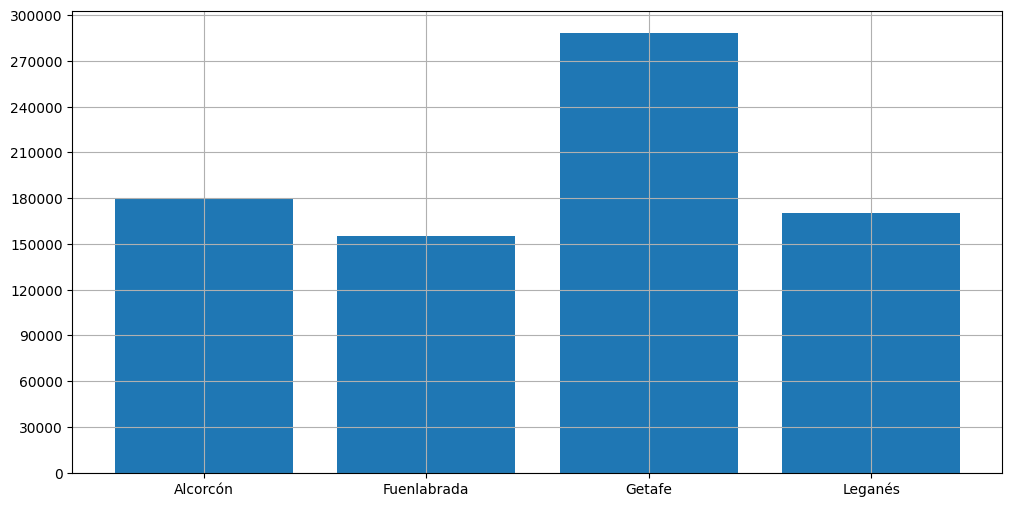

In [16]:
# TODO:
median_prices_south_cone = south_cone_prop.groupby('level5')['price'].median()
print(median_prices_south_cone)
plt.figure(figsize=(12,6))
plt.bar(median_prices_south_cone.index,median_prices_south_cone)
plt.yticks(np.linspace(0,300000,11))
plt.grid(True)


plt.show()

**Análisis General:**

Variación de Precios: Hay una variación significativa en los precios de las propiedades entre estas cuatro localidades. Getafe tiene las propiedades más caras en mediana, mientras que Fuenlabrada muestra el precio mediano más bajo.

Contexto Económico y Demográfico: Estas diferencias pueden reflejar factores como la ubicación, la infraestructura, las características demográficas y económicas de cada localidad. Por ejemplo, Getafe, al ser una localidad más cercana a Madrid y con mejor conectividad, podría tener precios más altos debido a una mayor demanda y mejores servicios.

Consideraciones para Inversión o Compra: Para inversores o compradores, estos datos indican dónde podrían encontrar propiedades más accesibles o dónde podrían necesitar un presupuesto más alto. Además, pueden ser útiles para evaluar el potencial de valorización y las oportunidades de mercado en cada área.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [17]:
# TODO
southcone_mean_var = pd.DataFrame()
southcone_mean_var['Price Mean'] = round(south_cone_prop.groupby('level5')['price'].mean(),2)
southcone_mean_var['Price Var'] = round(south_cone_prop.groupby('level5')['price'].var(),2)
southcone_mean_var['Rooms Mean'] = round(south_cone_prop.groupby('level5')['rooms'].mean(),2)
southcone_mean_var['Rooms Var'] = round(south_cone_prop.groupby('level5')['rooms'].var(),2)
southcone_mean_var['Surface Mean'] = round(south_cone_prop.groupby('level5')['surface'].mean(),2)
southcone_mean_var['Surface Var'] = round(south_cone_prop.groupby('level5')['surface'].var(),2)
southcone_mean_var['Bathrooms Mean'] = round(south_cone_prop.groupby('level5')['bathrooms'].mean(),2)
southcone_mean_var['Bathrooms Var'] = round(south_cone_prop.groupby('level5')['bathrooms'].var(),2)

print(southcone_mean_var)



             Price Mean     Price Var  Rooms Mean  Rooms Var  Surface Mean  \
level5                                                                       
Alcorcón      230071.05  1.594783e+10        2.91       0.93        105.91   
Fuenlabrada   177198.02  4.701021e+09        3.03       0.36        103.62   
Getafe        276481.10  1.871713e+10        3.18       0.77        126.15   
Leganés       208682.01  1.191394e+10        2.91       0.82        105.85   

             Surface Var  Bathrooms Mean  Bathrooms Var  
level5                                                   
Alcorcón         4244.32            1.62           0.59  
Fuenlabrada      2264.64            1.45           0.35  
Getafe           5989.00            1.86           0.68  
Leganés          3987.48            1.52           0.55  


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
# TODO
#most_exp_prop_by_popul = south_cone_prop.groupby('level5')['price'].max()
most_exp_prop_by_popul = []
for i in south_cone_prop.groupby('level5')['price'].idxmax():
    most_exp_prop_by_popul.append(south_cone_prop.loc[i])
most_exp_prop_by_popul = pd.DataFrame(most_exp_prop_by_popul)
print(most_exp_prop_by_popul[['price','address']])

         price                                address
5585    950000                               Alcorcón
11561   490000  Calle de Paulo Freire, 5, Fuenlabrada
2881   1050000                                 Getafe
10412   650000           Avenida Reina Sofía, Leganés


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_6445/3151936179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_cone_prop['Normalized Price'] = (south_cone_prop['price'] - south_cone_prop_min) / (south_cone_prop_max - south_cone_prop_min)


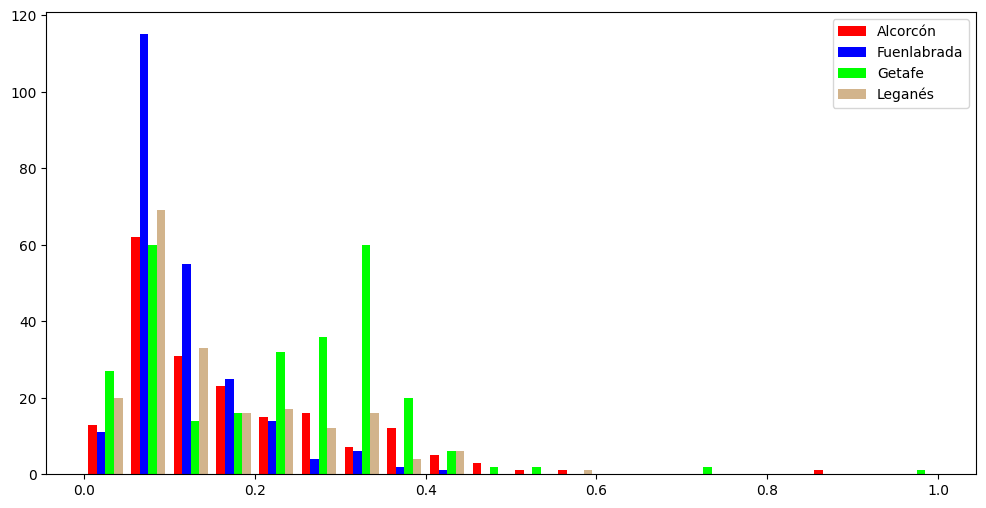

In [19]:
# TODO
south_cone_prop_min = south_cone_prop.price.min()
south_cone_prop_max = south_cone_prop.price.max()

south_cone_prop['Normalized Price'] = (south_cone_prop['price'] - south_cone_prop_min) / (south_cone_prop_max - south_cone_prop_min)

poblation_1 = 'Alcorcón'
poblation_2 = 'Fuenlabrada'
poblation_3 = 'Getafe'
poblation_4 = 'Leganés'

x1 = south_cone_prop[south_cone_prop['level5'] == poblation_1]['Normalized Price']
x2 = south_cone_prop[south_cone_prop['level5'] == poblation_2]['Normalized Price']
x3 = south_cone_prop[south_cone_prop['level5'] == poblation_3]['Normalized Price']
x4 = south_cone_prop[south_cone_prop['level5'] == poblation_4]['Normalized Price']

pers_bins = 20
pers_labels = [poblation_1, poblation_2, poblation_3, poblation_4]
pers_colors = ['red', 'blue', 'lime', 'tan']
plt.subplots(figsize=(12,6))
plt.hist([x1, x2, x3, x4], bins=pers_bins, color=pers_colors, label= pers_labels )
plt.legend()
plt.show()


La mayoría de los precios normalizados se encuentran en el rango de 0 a 0.4. Hay pocos valores más allá de este rango, lo que indica que la mayoría de las propiedades tienen precios similares y pocos precios extremos.

Estructura del Mercado: Getafe parece tener una mayor variabilidad en los precios, lo que puede ser indicativo de un mercado con mayor diversidad en tipos de propiedades y precios.

Precios Bajos en Fuenlabrada: La alta frecuencia de valores en 0 para Fuenlabrada sugiere que esta población tiene un mayor número de propiedades con precios muy bajos en comparación con las demás.

Similitud entre Alcorcón y Leganés: Ambas poblaciones muestran patrones de precios similares, lo que podría implicar condiciones de mercado comparables.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:
# TODO
south_cone_prop['pps'] = round((south_cone_prop['price'] / south_cone_prop['surface']),2)
varpps_getafe_vs_alcorcon = round(south_cone_prop.groupby('level5')['pps'].mean(),2).loc[['Getafe', 'Alcorcón']]

print(varpps_getafe_vs_alcorcon)


/tmp/ipykernel_6445/2282692538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_cone_prop['pps'] = round((south_cone_prop['price'] / south_cone_prop['surface']),2)


level5
Getafe      2174.59
Alcorcón    2239.30
Name: pps, dtype: float64


La diferencia de 64.71 EUR/m² entre Alcorcón y Getafe puede parecer pequeña, pero posiblemente refleja las percepciones de valor y las condiciones del mercado en cada área. Tanto compradores como inversores, deben considerar estos precios junto con otros factores cualitativos (deseabilidad) y cuantitativos (relacion calidad/precio) antes de tomar decisiones.

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

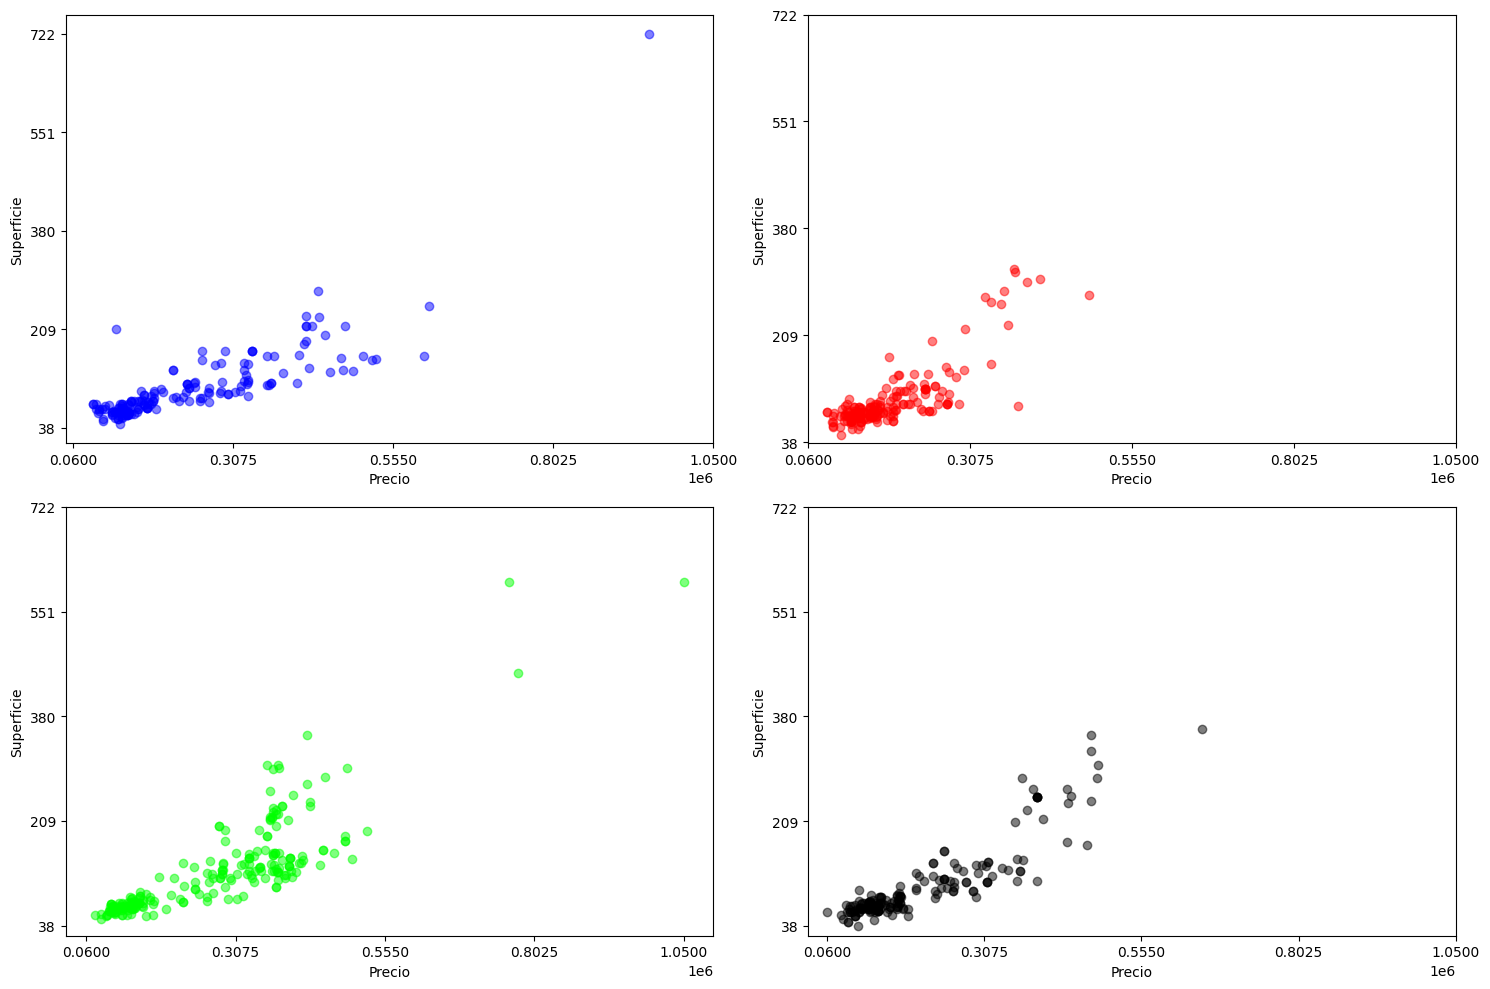

In [21]:
# TODO
x1_1 = south_cone_prop[south_cone_prop['level5'] == poblation_1]['price']
x2_1 = south_cone_prop[south_cone_prop['level5'] == poblation_2]['price']
x3_1 = south_cone_prop[south_cone_prop['level5'] == poblation_3]['price']
x4_1 = south_cone_prop[south_cone_prop['level5'] == poblation_4]['price']

y1_1 = south_cone_prop[south_cone_prop['level5'] == poblation_1]['surface']
y2_1 = south_cone_prop[south_cone_prop['level5'] == poblation_2]['surface']
y3_1 = south_cone_prop[south_cone_prop['level5'] == poblation_3]['surface']
y4_1 = south_cone_prop[south_cone_prop['level5'] == poblation_4]['surface']

south_cone_prop_surf_min = south_cone_prop.surface.min()
south_cone_prop_surf_max = south_cone_prop.surface.max()

x_ticks = np.linspace(south_cone_prop_min,south_cone_prop_max,5)
y_ticks = np.linspace(south_cone_prop_surf_min,south_cone_prop_surf_max,5)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.scatter(x1_1, y1_1, c='blue', alpha=0.5)
ax1.set_xlabel('Precio')
ax1.set_ylabel('Superficie')
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)

ax2.scatter(x2_1, y2_1, c='red', alpha=0.5)
ax2.set_xlabel('Precio')
ax2.set_ylabel('Superficie')
ax2.set_xticks(x_ticks)
ax2.set_yticks(y_ticks)

ax3.scatter(x3_1, y3_1, c='lime', alpha=0.5)
ax3.set_xlabel('Precio')
ax3.set_ylabel('Superficie')
ax3.set_xticks(x_ticks)
ax3.set_yticks(y_ticks)

ax4.scatter(x4_1, y4_1, c='black', alpha=0.5)
ax4.set_xlabel('Precio')
ax4.set_ylabel('Superficie')
ax4.set_xticks(x_ticks)
ax4.set_yticks(y_ticks)

plt.tight_layout()
plt.show()



#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [22]:
from ipyleaflet import Map, CircleMarker, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center=(40.33, -3.75), zoom=11, min_zoom=1, max_zoom=20, 
          basemap=basemaps.OpenStreetMap.Mapnik)

## Aquí: traza la coordenadas de los estados
coords = south_cone_prop[['level5','latitude','longitude']]
full_dict = coords.to_dict(orient='records')

## PON TU CÓDIGO AQUÍ:
for prop in full_dict :
    town = prop['level5']
    latitude = float(prop['latitude'].replace(',','.')) #despues de horas de no entender qué pasaba, encontre del formato con puntos en lugar de comas para esta libreria
    longitude = float(prop['longitude'].replace(',','.'))

    if town == 'Leganés' : color = 'green'
    elif town == 'Getafe' : color = 'red'
    elif town == 'Alcorcón' : color = 'blue'
    else : color = 'black'

    marker = CircleMarker(location=(latitude, longitude), radius=2, color=color, fill_color=color, title='town')
    map.add_layer(marker)
    

map

Map(center=[40.33, -3.75], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [23]:
git


NameError: name 'git' is not defined